In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings 
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('Loan_Data.csv')
data

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [3]:
data.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [18]:
for i in data.columns:
    if data[i].dtypes == 'O':
        data[i] = data[i].fillna(data[i].mode()[0])
    else:
        data[i] = data[i].fillna(data[i].mean())
    
data.isnull().sum().sort_index(ascending=False).head()

Self_Employed    0
Property_Area    0
Married          0
Loan_Status      0
Loan_ID          0
dtype: int64

In [19]:
num = data.select_dtypes(include = np.number)
cat = data.select_dtypes(include = object)

display(num.head())
display(cat.head())

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
0,5849,0.0,146.412162,360.0,1.0
1,4583,1508.0,128.000000,360.0,1.0
2,3000,0.0,66.000000,360.0,1.0
3,2583,2358.0,120.000000,360.0,1.0
4,6000,0.0,141.000000,360.0,1.0


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,Urban,Y
4,LP001008,Male,No,0,Graduate,No,Urban,Y


In [20]:
ds = data.copy()

# To force the conversion of the column to a numeric type, you can use the errors='coerce' argument.

ds['Dependents'] = pd.to_numeric(ds['Dependents'].str.rstrip('+'), errors='coerce')
ds['Dependents'] = ds['Dependents'].fillna(ds['Dependents'].mean())

num = ds.select_dtypes(include = np.number)
cat = ds.select_dtypes(include = object)

display(num.head())
display(cat.head())

,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
0,0,5849,0.0,146.412162,360.0,1.0
1,1,4583,1508.0,128.000000,360.0,1.0
2,0,3000,0.0,66.000000,360.0,1.0
3,0,2583,2358.0,120.000000,360.0,1.0
4,0,6000,0.0,141.000000,360.0,1.0


,Loan_ID,Gender,Married,Education,Self_Employed,Property_Area,Loan_Status
0,LP001002,Male,No,Graduate,No,Urban,Y
1,LP001003,Male,Yes,Graduate,No,Rural,N
2,LP001005,Male,Yes,Graduate,Yes,Urban,Y
3,LP001006,Male,Yes,Not Graduate,No,Urban,Y
4,LP001008,Male,No,Graduate,No,Urban,Y


In [21]:
# Preprocessing the data 

from sklearn.preprocessing import LabelEncoder, MinMaxScaler
import joblib

for i in ds.drop('Loan_ID', axis=1).columns:
    if ds[i].dtypes == 'O':
        encoder = LabelEncoder()
        ds[i] = encoder.fit_transform(ds[i])
        joblib.dump(encoder, f'{i}_encoder.pkl')
    else:
        scaler = MinMaxScaler()
        ds[i] = scaler.fit_transform(ds[[i]])
        joblib.dump(scaler, f'{i}_scaler.pkl')

ds.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,1,0,0.000000,0,0,0.070489,0.000000,0.198860,0.74359,1.0,2,1
1,LP001003,1,1,0.333333,0,0,0.054830,0.036192,0.172214,0.74359,1.0,0,0
2,LP001005,1,1,0.000000,0,1,0.035250,0.000000,0.082489,0.74359,1.0,2,1
3,LP001006,1,1,0.000000,1,0,0.030093,0.056592,0.160637,0.74359,1.0,2,1
4,LP001008,1,0,0.000000,0,0,0.072356,0.000000,0.191027,0.74359,1.0,2,1


<Axes: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

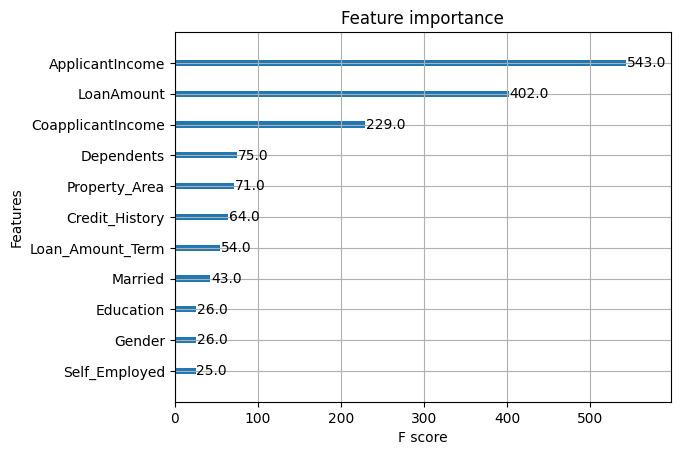

In [22]:
from xgboost import XGBClassifier 
import xgboost

x = ds.drop(['Loan_Status', 'Loan_ID'], axis=1)
y = ds['Loan_Status'] 

featureImportance = XGBClassifier()
featureImportance.fit(x, y)

xgboost.plot_importance(featureImportance, importance_type='weight')

In [23]:
ds.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [24]:
selFeatures = ['ApplicantIncome', 'LoanAmount', 'CoapplicantIncome', 'Dependents', 'Property_Area', 'Credit_History', 'Loan_Status']
ds = ds[selFeatures]

ds.head()

,ApplicantIncome,LoanAmount,CoapplicantIncome,Dependents,Property_Area,Credit_History,Loan_Status
0,0.070489,0.198860,0.000000,0.000000,2,1.0,1
1,0.054830,0.172214,0.036192,0.333333,0,1.0,0
2,0.035250,0.082489,0.000000,0.000000,2,1.0,1
3,0.030093,0.160637,0.056592,0.000000,2,1.0,1
4,0.072356,0.191027,0.000000,0.000000,2,1.0,1


In [26]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.ensemble import RandomForestClassifier

x = ds.drop('Loan_Status', axis=1)
y = ds['Loan_Status']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=32)

Testing for underfitting
Accuracy: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       151
           1       1.00      1.00      1.00       340

    accuracy                           1.00       491
   macro avg       1.00      1.00      1.00       491
weighted avg       1.00      1.00      1.00       491



<Axes: >

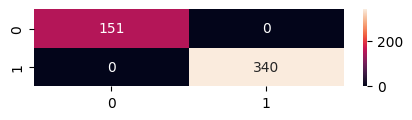

In [34]:
model = RandomForestClassifier()
model.fit(x_train, y_train)

y_pred = model.predict(x_train)
print('Testing for underfitting')
print('Accuracy:', accuracy_score(y_train, y_pred))
print(classification_report(y_train, y_pred))

plt.figure(figsize=(5, 1))
sns.heatmap(confusion_matrix(y_train, y_pred), annot=True, fmt='d')

Testing for overfitting
Test Accuracy: 0.7560975609756098
              precision    recall  f1-score   support

           0       0.72      0.44      0.55        41
           1       0.77      0.91      0.83        82

    accuracy                           0.76       123
   macro avg       0.74      0.68      0.69       123
weighted avg       0.75      0.76      0.74       123



<Axes: >

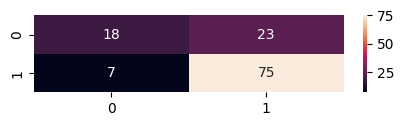

In [35]:
test_pred = model.predict(x_test)
print('Testing for overfitting')
print('Test Accuracy:', accuracy_score(y_test, np.round(test_pred)))
print(classification_report(y_test, np.round(test_pred)))

plt.figure(figsize=(5, 1))
sns.heatmap(confusion_matrix(y_test, np.round(test_pred)), annot=True, fmt='d')

In [36]:
# Save the model
joblib.dump(model, 'loan_model.pkl')

['loan_model.pkl']

In [37]:
x_test.columns

Index(['ApplicantIncome', 'LoanAmount', 'CoapplicantIncome', 'Dependents',
       'Property_Area', 'Credit_History'],
      dtype='object')